[View in Colaboratory](https://colab.research.google.com/github/billmlion/keras_ws/blob/master/19_Tensorflow_Mnist_MLP_h256.ipynb)

# 1.数据准备

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


# 2.建立模型

In [0]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [0]:
# 建立输入层 x 
x = tf.placeholder("float", [None, 784])

# 建立隐藏层h1
h1=layer(output_dim=256,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  
# 建立输出层
y_predict=layer(output_dim=10,input_dim=256,
                    inputs=h1,activation=None)



# 3.定义训练方式

In [6]:
#建立训练数据label真实值 placeholder
y_label = tf.placeholder("float", [None, 10])

#定义loss function
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))
#选择optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# 4.定义评估模型的准确率

In [0]:
#计算每一项数据是否正确预测
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

#将计算预测正确结果，加总平均
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 5.开始训练

In [0]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];
loss_list=[];
accuracy_list=[]
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", \
                "{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 6.410241604  Accuracy= 0.8448
Train Epoch: 02 Loss= 4.208977699  Accuracy= 0.8876
Train Epoch: 03 Loss= 3.328127384  Accuracy= 0.9032
Train Epoch: 04 Loss= 2.839210749  Accuracy= 0.9134
Train Epoch: 05 Loss= 2.525254965  Accuracy= 0.919
Train Epoch: 06 Loss= 2.263635635  Accuracy= 0.925
Train Epoch: 07 Loss= 2.014817476  Accuracy= 0.9282
Train Epoch: 08 Loss= 1.873287559  Accuracy= 0.9322
Train Epoch: 09 Loss= 1.747221112  Accuracy= 0.936
Train Epoch: 10 Loss= 1.654999971  Accuracy= 0.9416
Train Epoch: 11 Loss= 1.592970371  Accuracy= 0.9386
Train Epoch: 12 Loss= 1.558107257  Accuracy= 0.9408
Train Epoch: 13 Loss= 1.433523297  Accuracy= 0.9416
Train Epoch: 14 Loss= 1.438137293  Accuracy= 0.9432
Train Epoch: 15 Loss= 1.337883472  Accuracy= 0.9446
Train Finished takes: 41.5299186706543


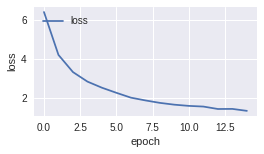

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

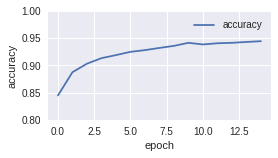

In [11]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 6.评估模型准确率

In [12]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images,
                                      y_label: mnist.test.labels}))

Accuracy: 0.9463


# 7.进行预测

In [0]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })

In [14]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

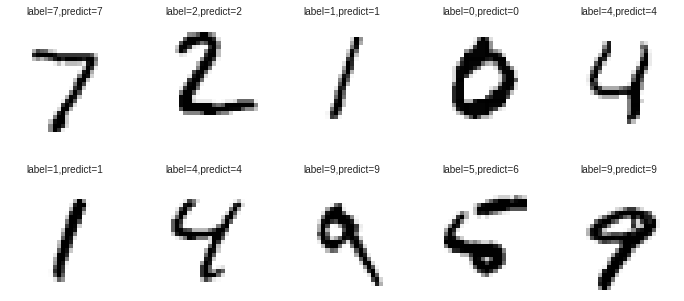

In [16]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

In [0]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: mnist.test.images })

In [18]:
y_predict_Onehot[8]

array([ 9.0170443e-02, -7.7009003e+01, -3.9955341e+01, -1.9126238e+01,
        1.5764010e+01,  8.9920471e+01,  9.4398308e+01, -9.8377457e+01,
        3.9008595e+01,  9.5211506e+00], dtype=float32)

# 8.找出预测错误

In [19]:
for i in range(400):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=8   label= 5 predict= 6
i=33   label= 4 predict= 0
i=36   label= 7 predict= 2
i=63   label= 3 predict= 2
i=115   label= 4 predict= 6
i=121   label= 4 predict= 8
i=149   label= 2 predict= 4
i=160   label= 4 predict= 8
i=175   label= 7 predict= 1
i=211   label= 5 predict= 7
i=215   label= 0 predict= 2
i=224   label= 1 predict= 2
i=247   label= 4 predict= 2
i=259   label= 6 predict= 0
i=268   label= 8 predict= 9
i=282   label= 7 predict= 2
i=321   label= 2 predict= 7
i=326   label= 2 predict= 1
i=340   label= 5 predict= 3
i=341   label= 6 predict= 5
i=358   label= 7 predict= 4
i=387   label= 2 predict= 8
i=391   label= 8 predict= 2


In [0]:
sess.close()